<a href="https://colab.research.google.com/github/Laskiri/Machine-Inteligence/blob/main/Session11_Exam_Rehearsal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center" style="font-size: 50px;">Machine Intelligence Exam</div>

### **Instructions**:

- Students are allowed to use any notes and material they want (physical or electronic).
- Students are allowed to use web search to find information
- Students are not allowed to query any information on the web and/or to use any generative AI tool or any automatic code generation.  
- Students are allowed to use any IDE they want (e.g., Visual Code, PyCharm) and Google Colab.
- The IDE or Google Colabe must not have any generative AI tool activated for code generation.  

### **Submission**:

- The submission must be a single Python notebook.
- The notebook must be named *MI_Exam.ipynb*.
- **The notebook must be submitted in the activity of Session 11 on the Moodle page**??


# Imports and Data Loading

This code imports essential Python libraries for data manipulation, numerical computing, and visualization, and sets NumPy array print precision to two decimal places for cleaner output.

In [ ]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays


This code defines a function `load_data()` that loads a bike sharing dataset from a CSV file, processes it by removing certain columns, and returns the feature matrix X, target values y, feature names, and index values in a format suitable for machine learning tasks. If loading from the Google Drive URL fails, the function will automatically attempt to load the data from a local file "./Train.csv" which should be placed in the same directory as the notebook.

In [ ]:
def load_data():
    try:
        # First try loading from URL
        df = pd.read_csv("https://drive.google.com/uc?id=1AeJXQa_BpRrUwUbzmQlqzFhMafOnuWwx", sep=',')
    except:
        # If URL fails, try loading from local file
        print("URL load failed. Attempting to load from local file...")
        try:
            df = pd.read_csv("./Train.csv", sep=',')
        except FileNotFoundError:
            raise FileNotFoundError("Could not load data from URL or local file './Train.csv'")

    # Rest of the function remains unchanged
    features = list(df)
    del features[0]
    del features[0]
    del features[len(features)-1]

    data = df.to_numpy()
    data = np.delete(data,1,axis=1)
    data = data.astype('float64')

    index = data[:,0]
    X = data[:,1:-1]
    y = data[:,-1]

    return X, y, features, index

# The Predictive Problem




### Description

Bike-sharing systems provide a convenient means of renting bicycles, with automated processes for membership, rental, and returns facilitated through a network of kiosks distributed across a city. These systems allow users to rent a bike from one location and return it to another, as needed. Globally, there are over 500 bike-sharing programs.

The data collected by these systems is highly valuable for researchers. Information such as travel duration, departure and arrival locations, and elapsed time is explicitly recorded, making these systems function as a dynamic sensor network for studying urban mobility. In this competition, participants are tasked with leveraging historical usage patterns and weather data to predict bike rental demand for the Capital Bikeshare program in Washington, D.C.

---

### Predictive Task

You are provided with hourly bike rental data spanning two years. The training set includes data from the first 19 days of each month, while the test set covers data from the 20th day to the end of the month. Your objective is to predict whether bike rental demand during each hour in the test set was **high** or **low**, using only information available prior to the rental period.

---

### Data Fields

- **yr**: Year (0 for 2011, 1 for 2012).  
- **month**: Month of the year (1-12).  
- **day**: Day of the month (1-31).  
- **hour**: Hour of the day (0-23).  
- **season**: Season of the year:  
  - 1 = Spring  
  - 2 = Summer  
  - 3 = Fall  
  - 4 = Winter  
- **holiday**: Indicator of whether the day is a holiday (1 = holiday, 0 = non-holiday).  
- **workingday**: Indicator of whether the day is a working day (1 = working day, 0 = weekend or holiday).  
- **weather**: Weather conditions categorized as:  
  - 1: Clear, Few clouds, Partly cloudy  
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds  
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds  
  - 4: Heavy Rain + Ice Pellets + Thunderstorm + Mist, Snow + Fog  
- **temp**: Actual temperature (normalized value).  
- **atemp**: Perceived "feels-like" temperature (normalized value).  
- **humidity**: Relative humidity percentage ((normalized value).  
- **windspeed**: Wind speed (normalized value).  
- **demand**: Target variable indicating rental demand:  
  - 0 (or False): Low demand  
  - 1 (or True): High demand  


# 1. Data Exploration and Preprocessing


This code loads the bike sharing training dataset into features (X_train), target values (y_train), feature names (X_features), and index values (index) using the load_data() function.

In [ ]:
# load the dataset
X_train, y_train, X_features, index = load_data()

# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")


X Shape: (10000, 12), X Type:<class 'numpy.ndarray'>)
y Shape: (10000,), y Type:<class 'numpy.ndarray'>)


- The following visualization is organized into **12 subplots** arranged in a **3x4 grid**, with each subplot representing the relationship between a specific feature and bike rental demand.

- Each bar in the subplots illustrates the **percentage distribution** between:
  - **High demand** (green)  
  - **Low demand** (red)  

- For **numeric features** (e.g., temperature, feels-like temperature, humidity, and windspeed):
  - The data is **discretized into 4 bins** to improve clarity and make the visualization more interpretable.

- This approach allows for an easy comparison of how different feature values influence rental demand.


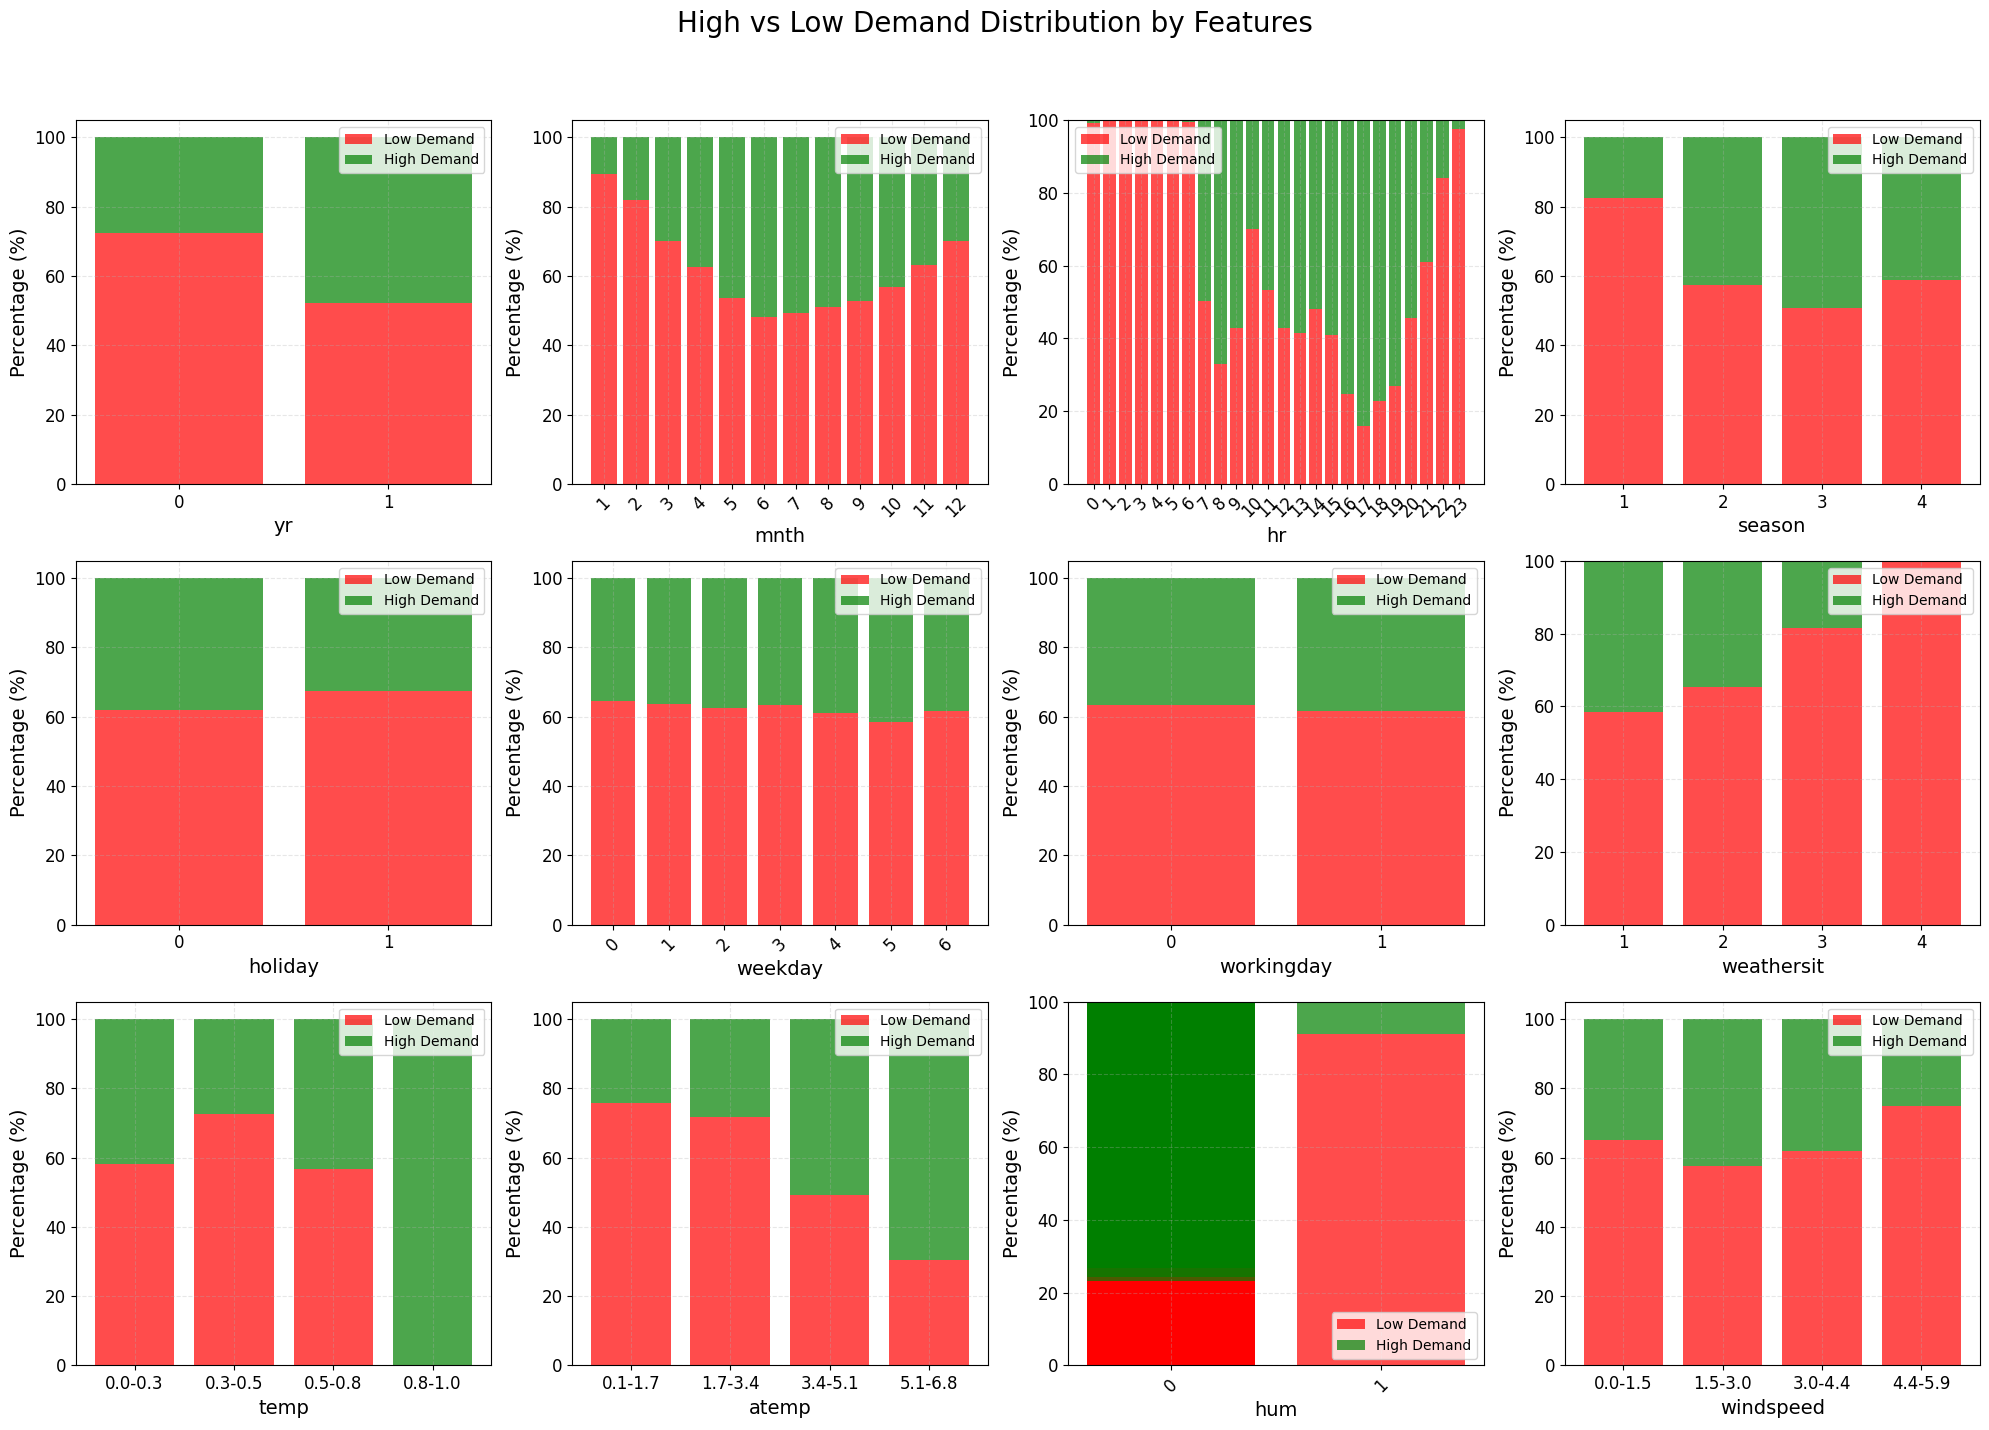

In [ ]:
# Create subplots for each feature
fig, ax = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('High vs Low Demand Distribution by Features', fontsize=20)

# Flatten ax array for easier iteration
ax = ax.ravel()

for i in range(len(ax)):
    feature_vals = X_train[:, i]

    # For numeric features (temp, atemp, humidity, windspeed), create bins
    if X_features[i] in ['temp', 'atemp', 'humidity', 'windspeed']:
        # Create 4 bins
        bins = np.linspace(feature_vals.min(), feature_vals.max(), 5)
        labels = [f'{bins[j]:.1f}-{bins[j+1]:.1f}' for j in range(len(bins)-1)]
        feature_vals = np.digitize(feature_vals, bins[1:-1])
        unique_vals = np.arange(len(labels))
        x_labels = labels
    else:
        # For categorical features, use as-is
        unique_vals = np.unique(feature_vals)
        x_labels = [str(int(val)) for val in unique_vals]

    high_demand = []
    low_demand = []

    # Calculate counts for high and low demand
    for val in unique_vals:
        mask = feature_vals == val
        total = np.sum(mask)
        if total > 0:
            high_count = np.sum(y_train[mask] == 1)
            low_count = np.sum(y_train[mask] == 0)
            # Convert to percentages
            high_demand.append((high_count / total) * 100)
            low_demand.append((low_count / total) * 100)

    # Create stacked bar plot
    ax[i].bar(x_labels, low_demand, label='Low Demand', color='red', alpha=0.7)
    ax[i].bar(x_labels, high_demand, bottom=low_demand, label='High Demand', color='green', alpha=0.7)

    ax[i].set_xlabel(X_features[i], fontsize=14)
    ax[i].set_ylabel('Percentage (%)', fontsize=14)
    ax[i].tick_params(axis='x', rotation=45 if len(x_labels) > 4 else 0)
    ax[i].grid(True, linestyle='--', alpha=0.3)
    ax[i].tick_params(axis='both', which='major', labelsize=12)
    ax[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## TASK 1:

Choose two features and analyze its relationship with bike demand.

Introduce your answer in the cell below.




### Answer (approx 200 words)
**"Introduce your answer here"**



# 2. Model Defintion



The provided code snippet demonstrates how to build, train, and evaluate a **logistic regression model** using Keras, a popular deep learning library. The model is designed to predict high demand in a bike-sharing dataset.

Epoch 1/100


/Users/zp25hk/Documents/github/andresmasegosa/2024-MI/myenv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.6345 - loss: 1.9399 - val_accuracy: 0.6720 - val_loss: 0.7652
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6671 - loss: 1.0456 - val_accuracy: 0.6315 - val_loss: 1.4696
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.6433 - loss: 1.3581 - val_accuracy: 0.7385 - val_loss: 0.7356
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.6792 - loss: 1.0690 - val_accuracy: 0.6730 - val_loss: 0.9235
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.6591 - loss: 1.1072 - val_accuracy: 0.7195 - val_loss: 0.6546
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.6604 - loss: 1.2236 - val_accuracy: 0.7340 - val_loss: 0.5743
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.6783 - loss: 0.9035 - val_accuracy: 0.7195 - val_loss: 0.6996
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.6753 - loss: 1.0104 - val_

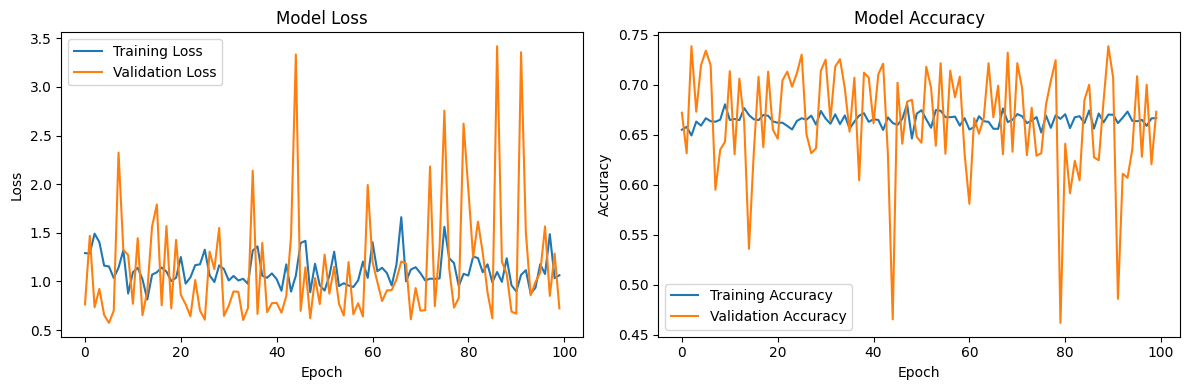

Final Training Loss: 1.0640
Final Training Accuracy: 0.6666
Final Validation Loss: 0.7227
Final Validation Accuracy: 0.6730


In [ ]:
# Import necessary libraries from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))  # Logistic regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X_train, y_train,
                   epochs=0.0,
                   batch_size=32,
                   validation_split=0.0,
                   verbose=1)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")



## TASK 2A: HYPERPARAMETER TUNING

When training your logistic regression model using Keras, selecting the right hyperparameters is essential to ensure optimal performance and generalization to unseen data. In this task, you are required to determine suitable values for three key hyperparameters: the **learning rate**, the **number of epochs**, and the **validation split**. Each of these decisions plays a critical role in shaping the training process and the model's final accuracy.

For each hyperparameter, provide a clear rationale for your chosen values. To guide your reasoning, consider the following:

- **Learning Rate**:  
  How does your selected learning rate balance the trade-off between model convergence speed and training stability? What potential issues, such as slow convergence or overshooting, could arise with suboptimal values?

- **Number of Epochs**:  
  Why is your chosen number of epochs appropriate, given the complexity of your dataset and the risk of overfitting or underfitting? How do you plan to monitor performance during training to refine this choice?

- **Validation Split**:  
  How does your chosen validation split ensure a robust and reliable evaluation of your model’s performance during training? What considerations (e.g., dataset size or class balance) influenced this decision?

Provide your reasoning and selected values in the cell below. Be sure to connect your choices to the specifics of your dataset and model to demonstrate a thoughtful approach to hyperparameter tuning.

**If the training takes longer than 2 min consider stop the training and do not explore these configurations.**


### Answer (approx 200 words)
**"Introduce your answer here"**



## TASK 2B: CREATING A MULTI-LAYER PERCEPTRON

Now that you have gained experience training models, your next task is to create a **multilayer perceptron (MLP)** using Keras and train it as you did in previous exercises. Follow the steps below to guide your experimentation:

- **Create and Experiment with Different Architectures**:  
  - Vary the **number of layers**.  
  - Adjust the **number of neurons in each layer (width)** .  
  - Use **different activation functions**.  

- **Train and Evaluate**:  
  - Train each configuration and monitor the key metrics (e.g., accuracy, loss) to compare different configurations.  

- **Analyze and Discuss**:  
  - Discuss your findings and justify which one would be the best configuration for this dataset and problem.  




Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7050 - loss: 0.5665 - val_accuracy: 0.7580 - val_loss: 0.4725
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.7885 - loss: 0.4126 - val_accuracy: 0.7935 - val_loss: 0.4100
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - accuracy: 0.8024 - loss: 0.3935 - val_accuracy: 0.8140 - val_loss: 0.3801
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.8133 - loss: 0.3805 - val_accuracy: 0.8070 - val_loss: 0.3734
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8212 - loss: 0.3658 - val_accuracy: 0.8145 - val_loss: 0.3705
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.8184 - loss: 0.3625 - val_accuracy: 0.8045 - val_loss: 0.3842
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.8226 - loss: 0.3594 - val_accuracy: 0.8475 - val_loss: 0.3429
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step - accuracy: 0.8530 - loss: 0.3

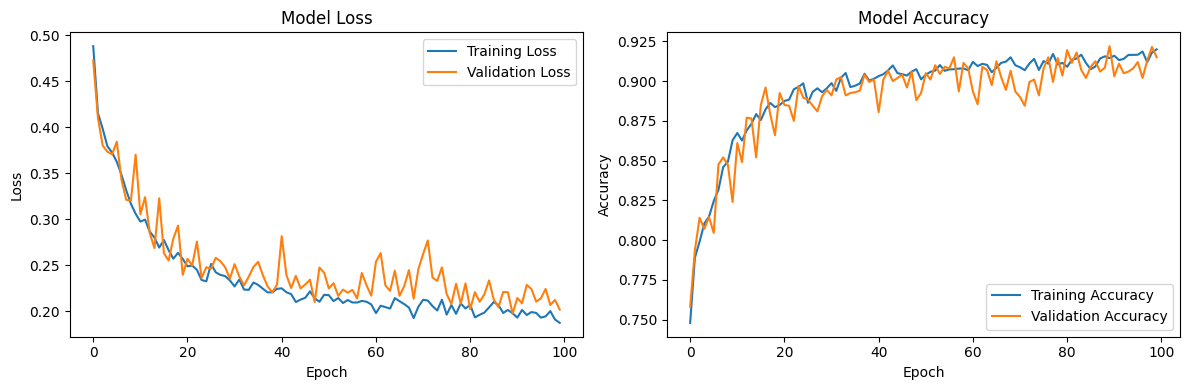

Final Training Loss: 0.1876
Final Training Accuracy: 0.9200
Final Validation Loss: 0.2020
Final Validation Accuracy: 0.9150


In [ ]:
#Introduce the code for the MLP here

# Import necessary libraries from Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Define the model
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = model.fit(X_train, y_train,
                   epochs=100,
                   batch_size=32,
                   validation_split=0.2,
                   verbose=1)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print final metrics
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

### Answer (approx 200 words)
**"Introduce your answer here"**



# 3. Model Evaluation

## 3a: What metric(s) are the most appropriate for your evaluation setup, and why? (100 words)

## 3b: What changes in these metrics did you observe with different models and hyperparameter settings? (100 words)

# Task 4. Discussion of relevant take-aways. Take care to use correct terminology as presented in the course, and discuss subjects related to the course material.

## 4a: Dataset (100 words)

## 4b: Model (100 words)

## 4c: Evaluation (100 words)


